---
title: Lab 1 Data Viz
author: Marvin (Wenxiang) Li
format:
    html:
        toc: False
        code-fold: true
embed-resources: true
---

In [1]:
import pandas as pd
import plotnine as p9
import numpy as np

## Taks 1
### 1. Based on the graph, we can find the following:
y = Life expectancy, x = Income, color = region, and size = population.

### 2. Import the dataset.

In [2]:

df1 = pd.read_csv('/Users/marvinlee/Documents/vs_code/gsb_544/lab/lab_1/q1data.csv')
df1 = df1.dropna()
df1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


### 3. Plot the graph

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


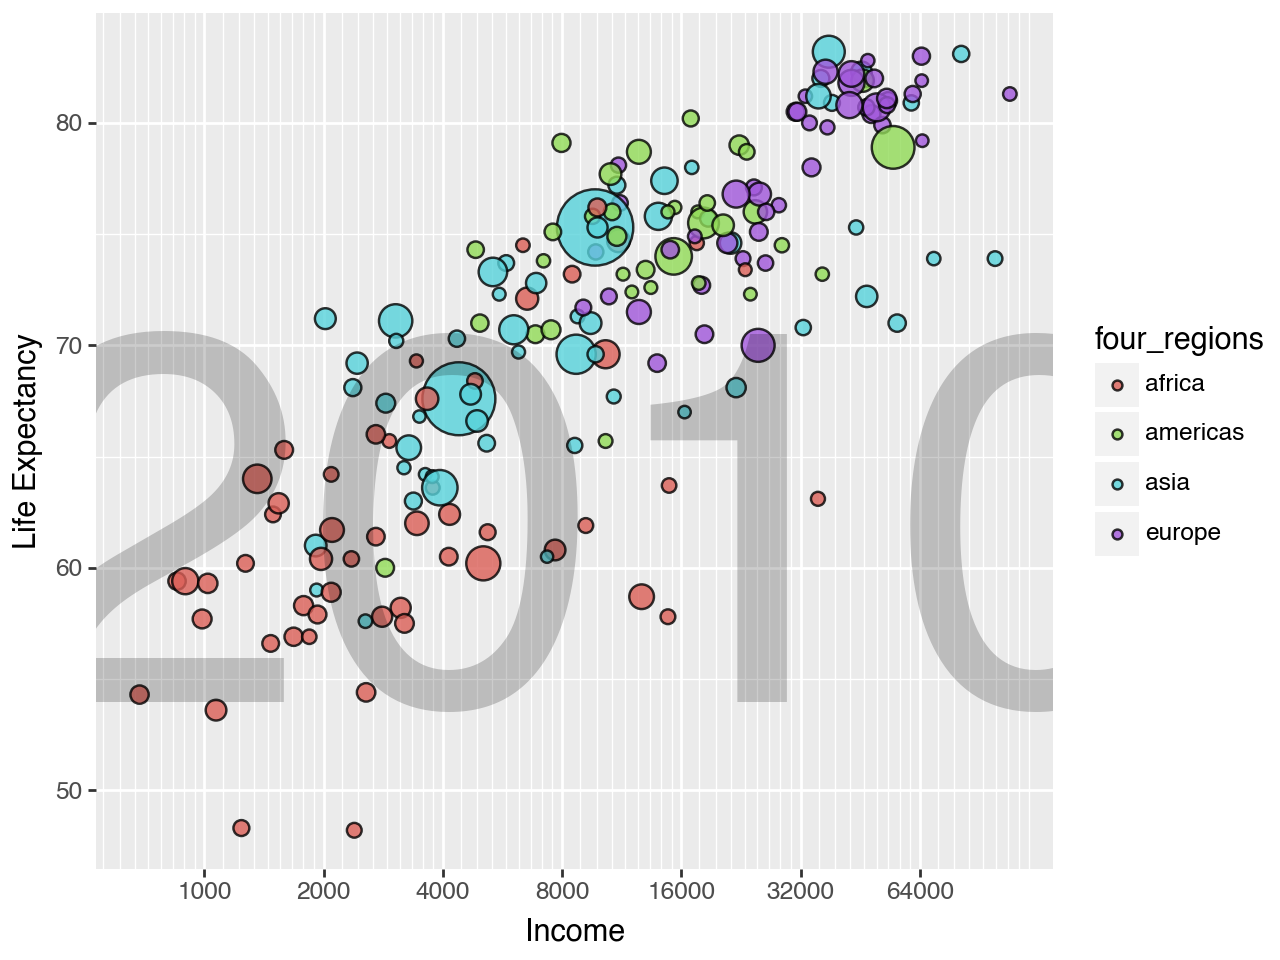

[<Figure Size: (640 x 480)>]

In [3]:
[p9.ggplot(df1) +
 p9.geom_point(p9.aes(x = "income", y= "life_exp",fill = "four_regions", size = "population"), alpha = 0.8) +
 p9.scale_x_log10(breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) + # not a regular scale; suggested by ChatGPT
 p9.scale_size(range=(2, 15)) + # make all points bigger 
  # changed ratio
 p9.guides(size = "none")+ # suggested by Kyle
 p9.labs(x = "Income", y ="Life Expectancy")+
 p9.annotate("text", x = 10000, y = 60, label = "2010", size = 190, color = "black", alpha =0.2) # suggested by Kyle
]

### 4. One different graph
The horizontal bar chart below shows the same infomation as the scatterplot. The setback is that the correlation between income and life expectancy is not as obvious as the scattor plot. The coloring scale does show that rich countries where the bars are yellow tend to have longer bars. The advantage of this graph is that this bar chart clearly lists each country compared to the overlapping scatter plot in part 1. 

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


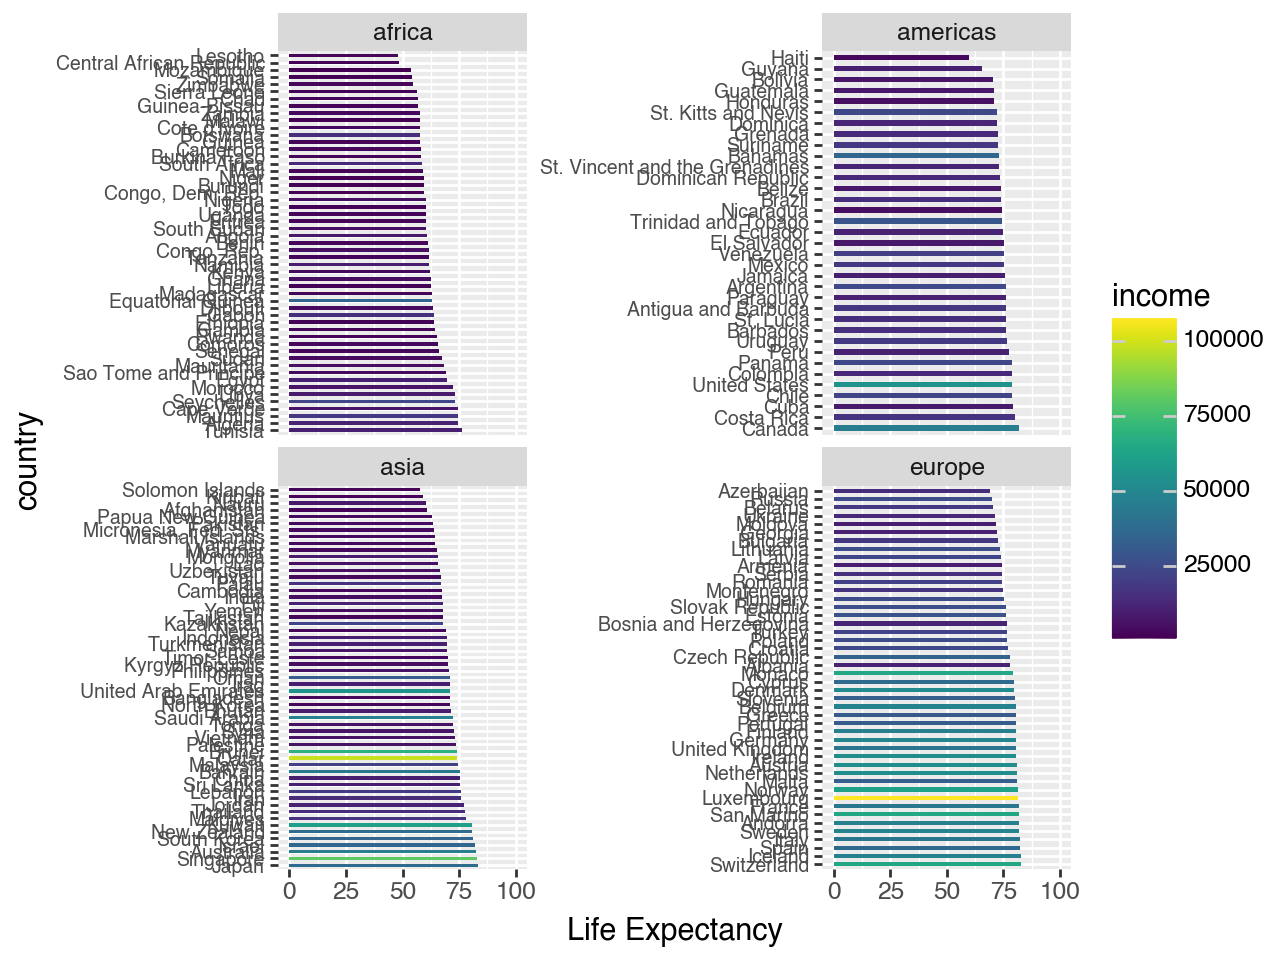

[<Figure Size: (640 x 480)>]

In [4]:
df1['country'] = pd.Categorical(df1['country'], categories=df1.sort_values('life_exp', ascending=False)['country']) # sort by life_expct suggested by Chat
[p9.ggplot(df1) +
 p9.aes(x = "country", y = "life_exp", fill = "income") +
 p9.geom_bar(stat="identity",width=0.5) +
 p9.coord_flip() +
 p9.theme(
          axis_text_y=p9.element_text(size= 7)) +
 p9.labs(y ="Life Expectancy") +
 p9.ylim(0, 100) + 
 p9.facet_wrap('~four_regions', scales='free_y', ncol=2) # facet by regions without countries that don not belong to it suggested by ChatGPT
]

## Task 2
### 1. Based on the graph, we can find the following:
y = Imports% of GDP, x = Exports% of GDP, color = region, and size = energy.

### 2. Import the dataset and clean.

In [6]:
df2 = pd.read_csv('/Users/marvinlee/Documents/vs_code/gsb_544/lab/lab_1/q2data.csv')
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 1 to 205
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   imports            127 non-null    float64
 1   exports            127 non-null    float64
 2   energy             127 non-null    object 
 3   year               127 non-null    int64  
 4   country            127 non-null    object 
 5   four_regions       127 non-null    object 
 6   six_regions        127 non-null    object 
 7   eight_regions      127 non-null    object 
 8   world_bank_region  127 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 9.9+ KB


In [7]:
df2['energy'] = df2['energy'].str.replace('k', '', regex=False).astype(float) * df2['energy'].str.endswith('k').map({True: 1000, False: 1})
# convert 12.4k and 13.9k to 124000 and 139000; code suggested by Chat 

### 3. Recreate the plot

<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_83099/3041637159.py:6: SyntaxWarning: invalid escape sequence '\%'
/var/folders/m1/tx6ck0f962jd1hq4ch5phg_80000gn/T/ipykernel_83099/3041637159.py:6: SyntaxWarning: invalid escape sequence '\%'
/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


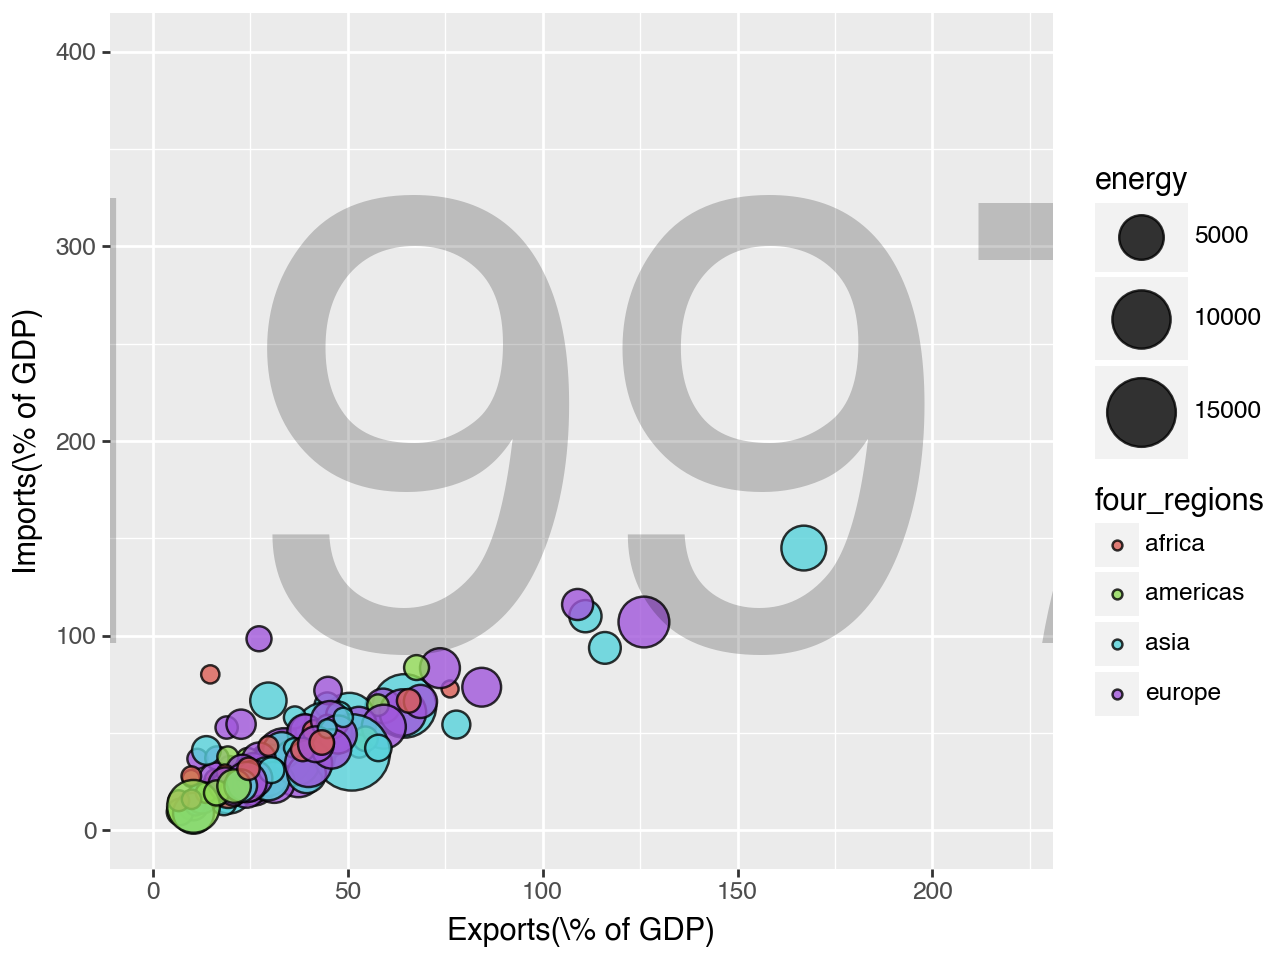

[<Figure Size: (640 x 480)>]

In [8]:
[p9.ggplot(df2) +
 p9.geom_point(p9.aes(x = "exports", y= "imports",fill = "four_regions", size = "energy"), alpha = 0.8) +

 p9.ylim(0, 400) +
 p9.xlim(0, 220) +
 p9.labs(x = "Exports(\% of GDP)", y ="Imports(\% of GDP)")+
 p9.scale_size(range=(2,15)) +
p9.annotate("text", x = 115, y = 180, label = "1997", size = 230, color = "black", alpha =0.2)
]

### 4. One different graph
Using a mirror bar graph to showcase the same idea. Muliplying all export values by -1. Down scaling energy usage to per 100 unit usage to mach the y value. Need to creat a legend by hand due to not using categorical value for the fill argument.

In [9]:
df2["neg_exports"] = df2["exports"] * -1
df2["energy_100"] = df2["energy"] / 100

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


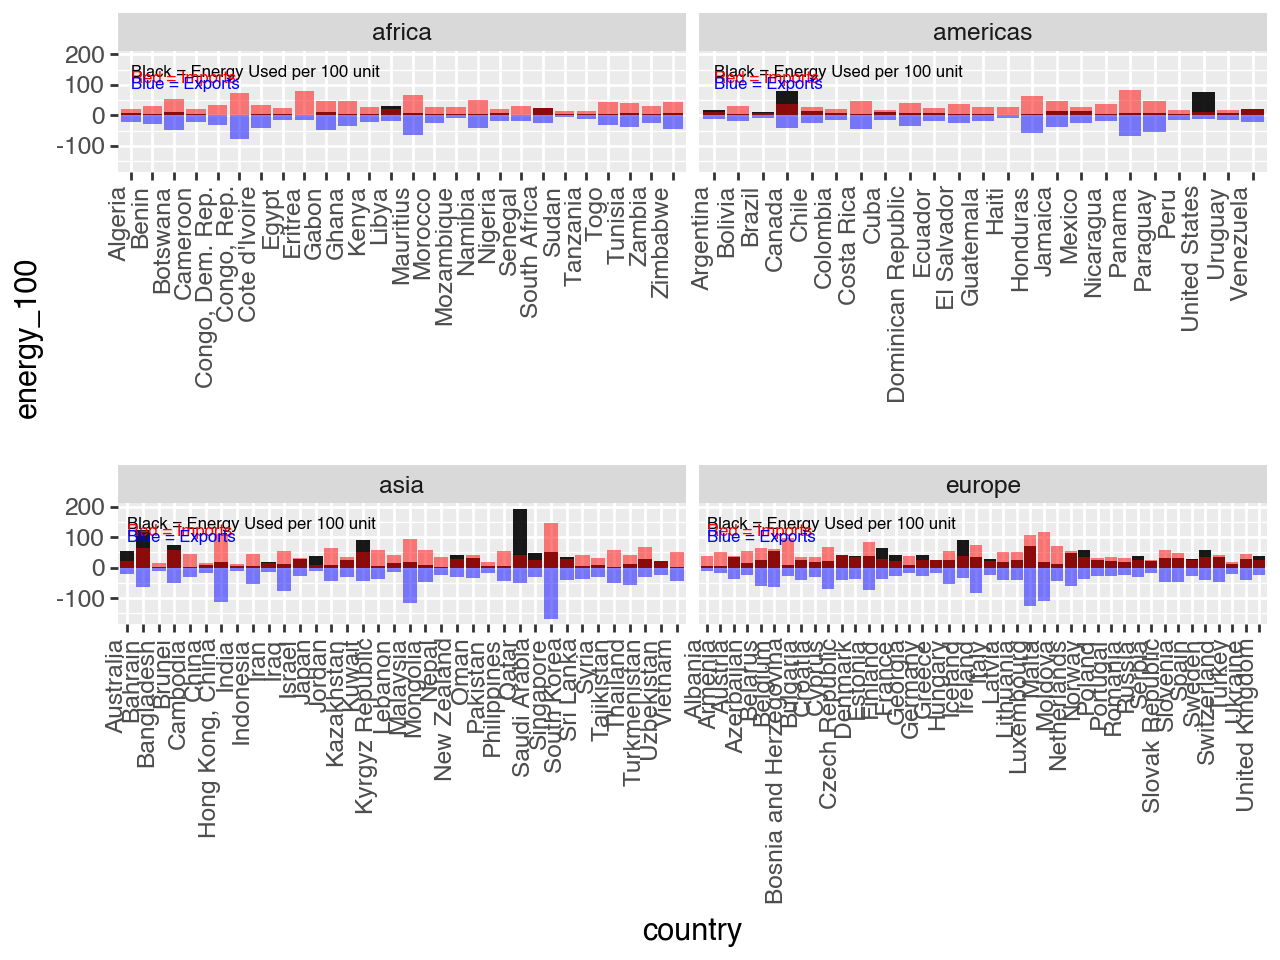

[<Figure Size: (640 x 480)>]

In [10]:
[p9.ggplot(df2) +
 p9.aes(x="country") +
 p9.geom_bar(p9.aes(y="energy_100"), stat="identity", fill="black", alpha =0.9) +
 p9.geom_bar(p9.aes(y="imports"), stat="identity", fill="red", alpha = 0.5) +
 p9.geom_bar(p9.aes(y="neg_exports"), stat="identity", fill="blue", alpha = 0.5) + 
 p9.facet_wrap('~four_regions', scales='free_x', ncol=2) +
 p9.theme(
          axis_text_x=p9.element_text(angle=90, hjust=1)) +
 p9.annotate("text", x=1, y=140, label="Black = Energy Used per 100 unit", color="black", size=6, ha='left') + # using anotation instead of a legend; code suggested by Chat
 p9.annotate("text", x=1, y=120, label="Red = Imports", color="red", size=6, ha='left') +
 p9.annotate("text", x=1, y=100, label="Blue = Exports", color="blue", size=6, ha='left')
]

## Task 3
### 1. Based on the graph, we can find the following:
y = GDP per capita, x = Individual using internet, color = region, and size = income.

### 2. Import the dataset.

In [11]:
df3 = pd.read_csv('/Users/marvinlee/Documents/vs_code/gsb_544/lab/lab_1/q3data.csv')
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 214
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   internet_users     181 non-null    float64
 1   gdp                181 non-null    float64
 2   income             181 non-null    float64
 3   year               181 non-null    int64  
 4   country            181 non-null    object 
 5   four_regions       181 non-null    object 
 6   six_regions        181 non-null    object 
 7   eight_regions      181 non-null    object 
 8   world_bank_region  181 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.1+ KB


### 3. Recreate the plot

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


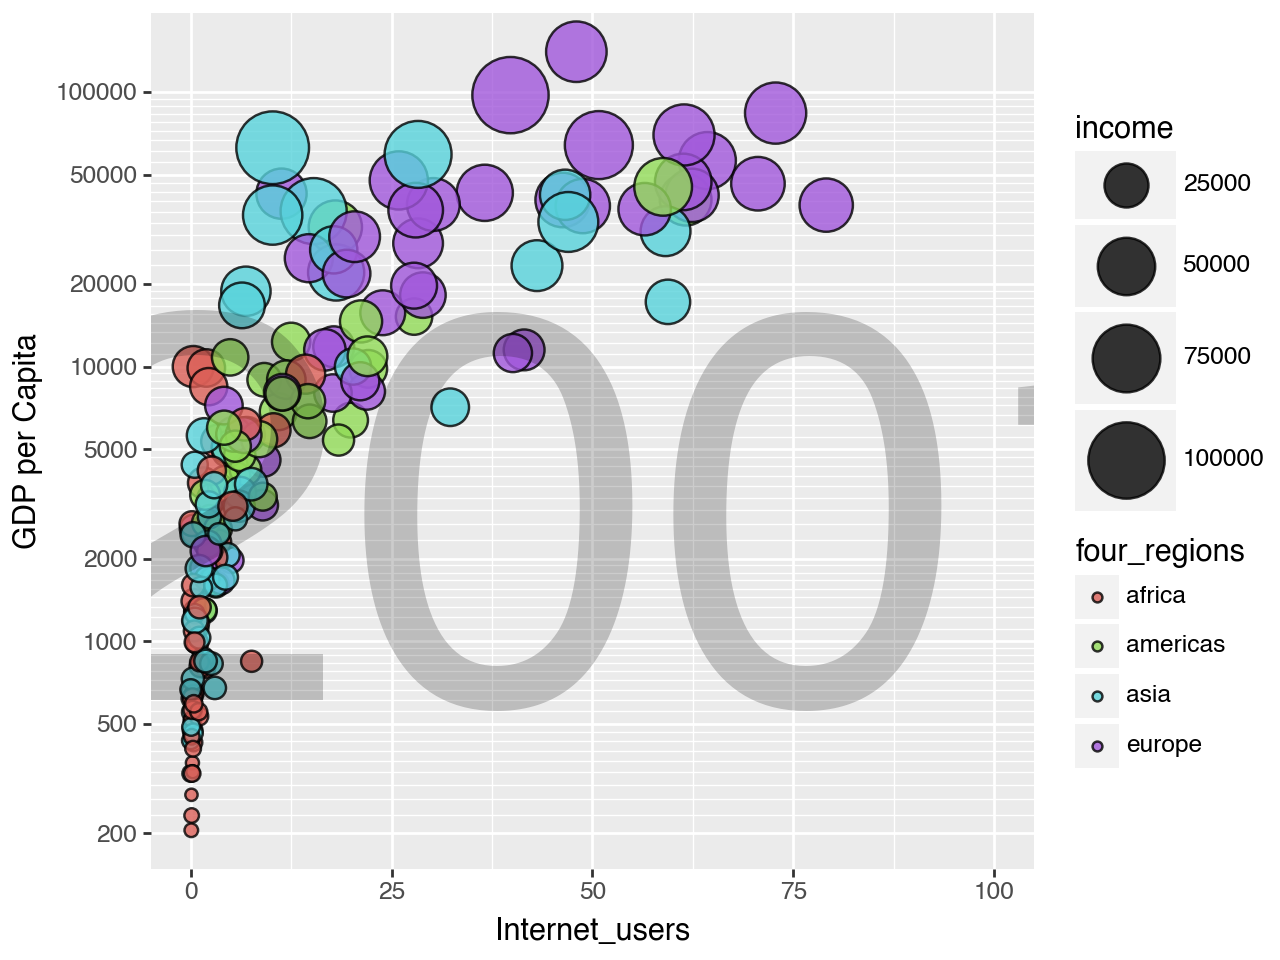

[<Figure Size: (640 x 480)>]

In [12]:
[p9.ggplot(df3) +
 p9.geom_point(p9.aes(x = "internet_users ", y= "gdp",fill = "four_regions", size = "income"), alpha = 0.8) +

 p9.xlim(0, 100) +
 p9.scale_y_log10(breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]) +
 p9.labs(x = "Internet_users", y ="GDP per Capita")+
 p9.scale_size(range=(2,15)) + 
 p9.annotate("text", x = 58, y = 2000, label = "2001", size = 200, color = "black", alpha =0.2)
]

### 4. One different graph
Using a jitter plot to illustrate the same idea with out overlapping the plots although location of the plots are not precise. 

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


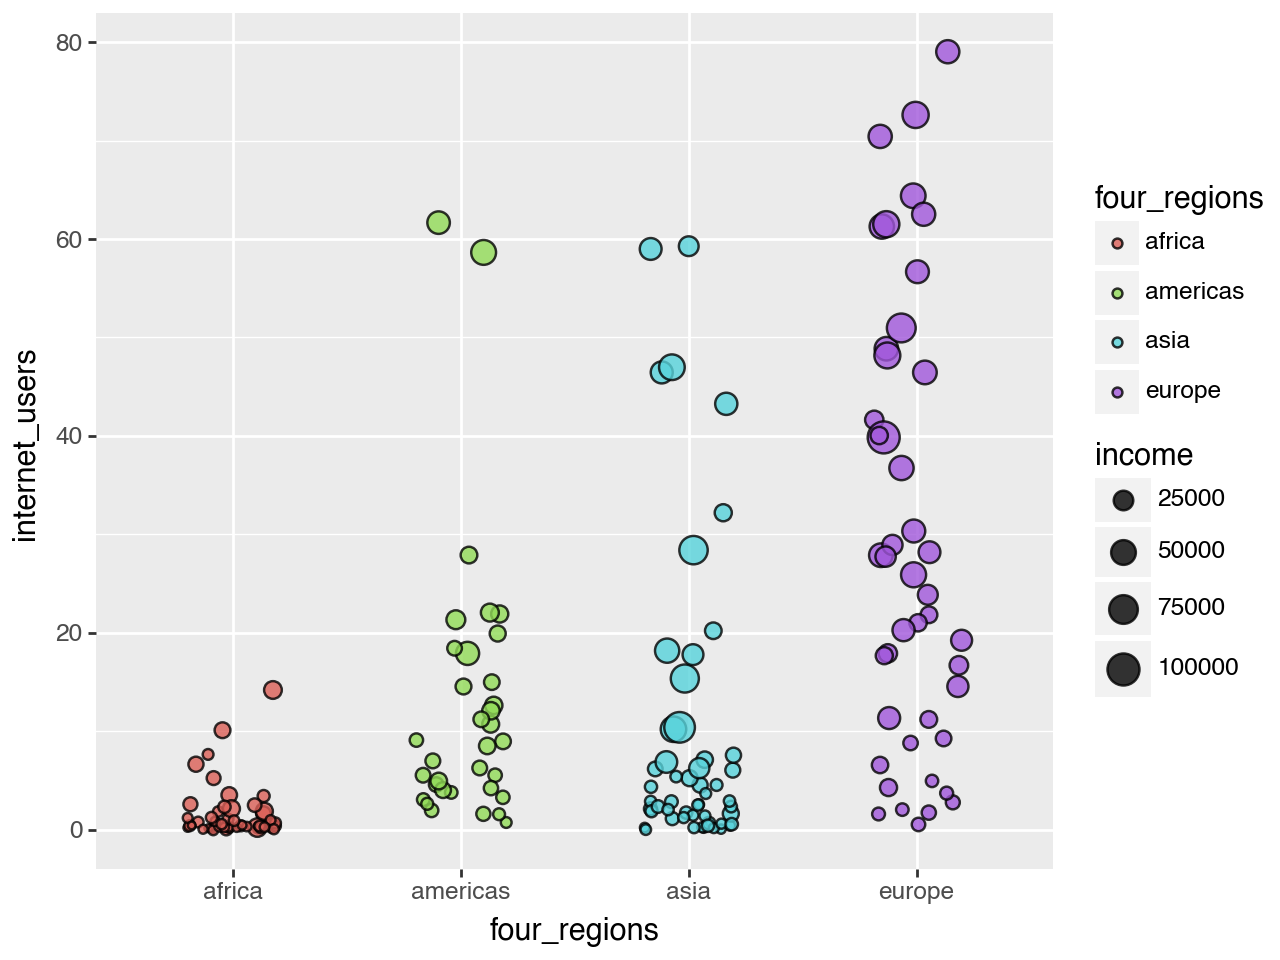

[<Figure Size: (640 x 480)>]

In [18]:
[p9.ggplot(df3) +
 p9.aes(x = "four_regions", y= "internet_users ",fill = "four_regions", size = "income") +
 p9.geom_jitter(width=0.2, height=0.2, alpha = 0.8)
]